In [1]:
import twint 
import pandas as pd
import matplotlib.pyplot as plt
import nest_asyncio
from datetime import date, timedelta
from wordcloud import WordCloud, STOPWORDS
from stop_words import get_stop_words
from stop_words import safe_get_stop_words

nest_asyncio.apply()

In [2]:
c = twint.Config()
c.Search = "MemoValenciaR"
c.Since = '2021-04-01 00:00:00'
c.Until = '2021-05-12 00:00:00'
c.Limit = 200
c.Pandas = True
twint.run.Search(c)

1392265849671720961 2021-05-11 18:50:20 -0500 <MemoValenciaR> Evento del día de las madres en la #TenenciaMorelos. Gracias a todas y todos por su asistencia, les comparto el link 👇🏻  https://t.co/hCPeWvk08Y
1392265705706377224 2021-05-11 18:49:45 -0500 <Deacon33C> @MemoValenciaR Vamos Memo!!! Confiamos en ti  #ConMemoSì  https://t.co/aK8dV12Xk3
1392255659631071234 2021-05-11 18:09:50 -0500 <713Justice> @ana_xix @MemoValenciaR La verdad no le creo ni tantito a este cuate debemos reconocer que es un gran simulador como buen PRIISTA
1392246577406824450 2021-05-11 17:33:45 -0500 <gerardomuniz> @marcocoronel @MemoValenciaR @PRI_Nacional @DeniseMaerker @NTelevisa_com Se ve muy ":montado "
1392234075063193609 2021-05-11 16:44:04 -0500 <ALEX19887910768> @LaConstanze @CiroGomezL @MemoValenciaR Los criminales de cuello blanco son peligrosos pero mas peligroso el chayotero a sueldo del PRIAN llamado Gomez Leyva, ese si es un peligro para la nación.
1392226101922045957 2021-05-11 16:12:23 -0500 <A

1391735956873613319 2021-05-10 07:44:43 -0500 <FuckImPato> @gabriel_looez @Cesar69814796 @MemoValenciaR Por? Que dices que los politicos no hacen eso? Menos en Michoacán? Vaciles
1391735323202314242 2021-05-10 07:42:12 -0500 <CiroGomezL> #AlAire en #PorLaMañana @MemoValenciaR, candidato del #PRI a la alcaldía de Morelia. El sábado en la noche sujetos armados atacaron la camioneta que normalmente usa el candidato, dos personas de su equipo resultaron heridas.
1391734385548959748 2021-05-10 07:38:29 -0500 <RaulMoralesJR2> @MemoValenciaR @PartidoMorenaMx no están haciendo bien las cosas pero esto es algo que ustedes @PRI_Nacional también sembraron, bienvenidos a México ahora disfruten de esa cosecha, de mi parte todos ustedes políticos se pueden ir al infierno.
1391721852326789120 2021-05-10 06:48:41 -0500 <erik_aviles> Algo está muy mal cuando participar electoralmente amenaza tu existencia.   Comparto nota del diario Reforma en su edición de hoy, donde @MemoValenciaR brinda detalles del

In [3]:
df = twint.storage.panda.Tweets_df


In [4]:
datel = df['date'].to_list() 

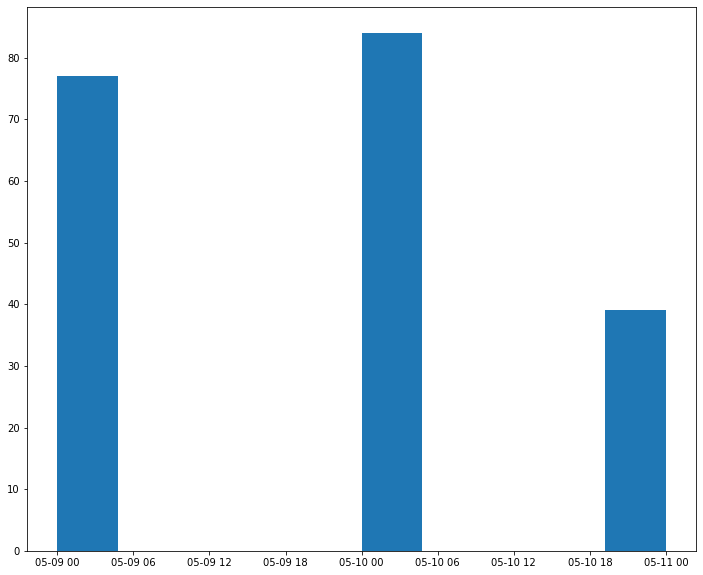

In [5]:
dates=[]
for t in datel:
    date_str = t.split(' ')[0]
    year, month, day = [int(i) for i in date_str.split('-')]
    d = date(year, month, day)
    dates.append(d)

dates.sort()
mindate = dates[0]
maxdate = dates[-1]

length = (maxdate - mindate).days + 1

plt.figure(figsize=(12,10))
plt.hist(dates)
plt.show()


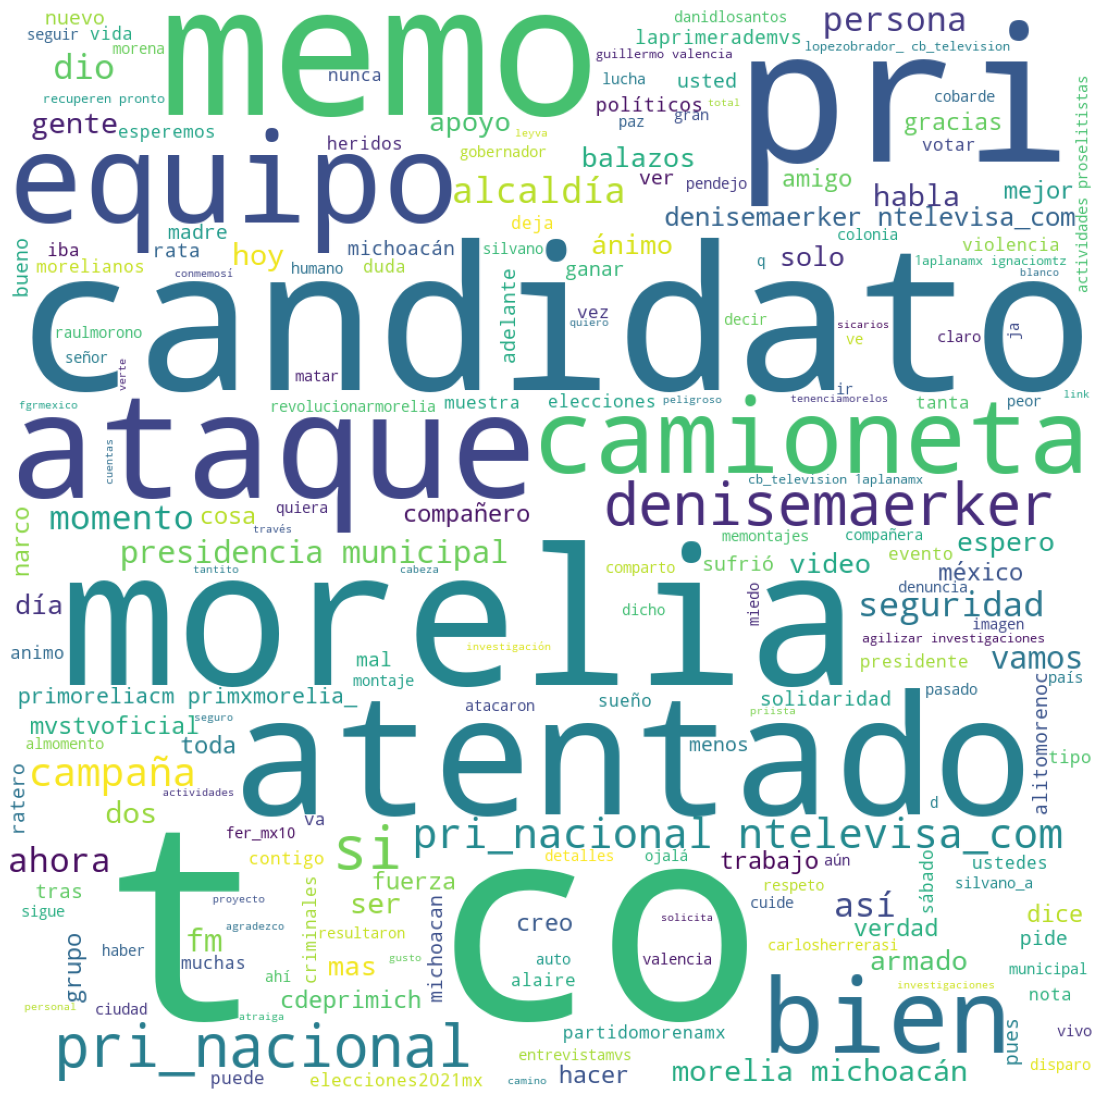

In [6]:
tweets = df['tweet'].to_list()
words = ''
stopwords = get_stop_words('spanish')
stopwords.append('https')
#stopwords.append(df['username'].to_list())

username = df['username'].to_list()

for usr in username:
    stopwords.append(usr)



for val in tweets:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 1000, 
                      height = 1000, 
                      background_color='white', 
                      stopwords = stopwords, 
                      min_font_size = 5). generate(words)   

plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()